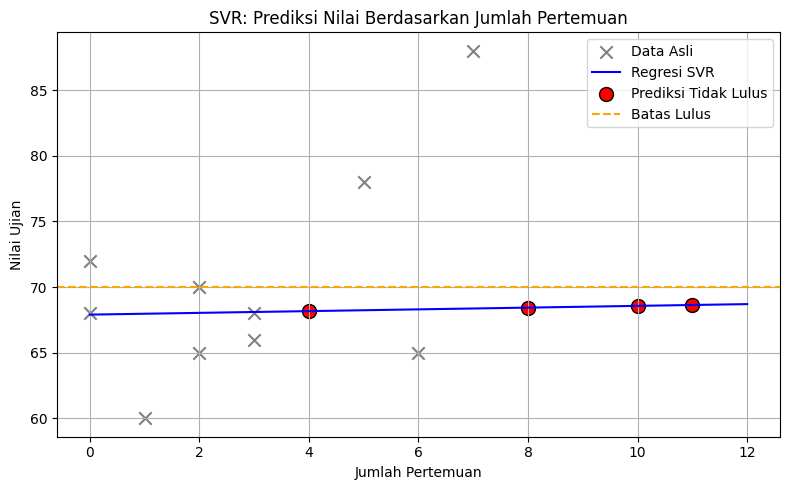

[(np.int64(4), np.float64(68.16666666666666), 'Tidak Lulus'),
 (np.int64(8), np.float64(68.43333333333331), 'Tidak Lulus'),
 (np.int64(10), np.float64(68.56666666666663), 'Tidak Lulus'),
 (np.int64(11), np.float64(68.6333333333333), 'Tidak Lulus')]

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# data asli: X = jumlah pertemuan, Y = nilai ujian
X = np.array([[2], [5], [1], [0], [3], [6], [2], [7], [0], [3]])
y = np.array([65, 78, 60, 72, 68, 65, 70, 88, 68, 66])  

# model SVR (Support Vector Regression)
model = SVR(kernel='linear')
model.fit(X, y)

# prediksi untuk jumlah pertemuan 4, 8, 10, 11
X_prediksi = np.array([[4], [8], [10], [11]])
y_prediksi = model.predict(X_prediksi)

# tentukan status kelulusan berdasarkan nilai prediksi
hasil_prediksi = ["Lulus" if nilai >= 70 else "Tidak Lulus" for nilai in y_prediksi]

# gabungkan hasil prediksi
prediksi_hasil = list(zip(X_prediksi.flatten(), y_prediksi, hasil_prediksi))

# visualisasi
plt.figure(figsize=(8, 5))

# titik data asli
plt.scatter(X, y, color='gray', label='Data Asli', marker='x', s=80)

# garis regresi
x_range = np.linspace(0, 12, 100).reshape(-1, 1)
y_range = model.predict(x_range)
plt.plot(x_range, y_range, color='blue', label='Regresi SVR')

# titik prediksi
for x, nilai, status in prediksi_hasil:
    color = 'green' if status == "Lulus" else 'red'
    plt.scatter(x, nilai, color=color, s=100, edgecolors='black', label=f'Prediksi {status}' if f'Prediksi {status}' not in plt.gca().get_legend_handles_labels()[1] else "")

# format grafik
plt.xlabel("Jumlah Pertemuan")
plt.ylabel("Nilai Ujian")
plt.title("SVR: Prediksi Nilai Berdasarkan Jumlah Pertemuan")
plt.axhline(70, color='orange', linestyle='--', label='Batas Lulus')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

prediksi_hasil


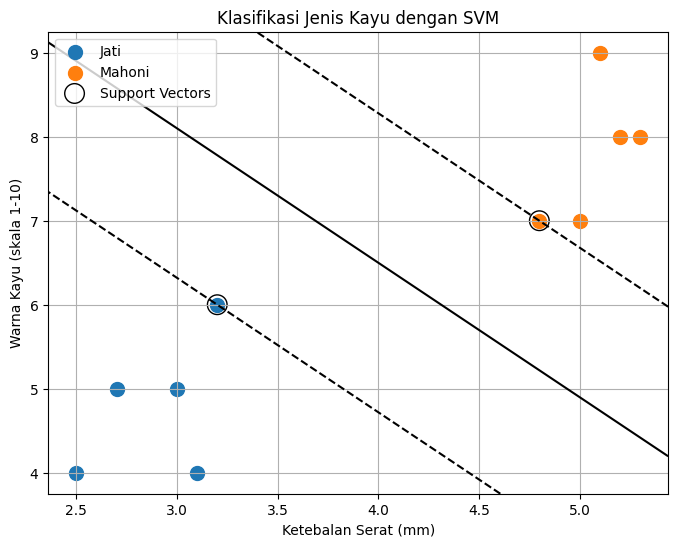

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# 1. Data dummy: ketebalan serat dan warna
# Format: [ketebalan serat (mm), warna kayu (1-10)]
X = np.array([
    [2.5, 4], [2.7, 5], [3.0, 5], [3.2, 6], [3.1, 4],  # Jati
    [5.0, 7], [5.2, 8], [4.8, 7], [5.1, 9], [5.3, 8]   # Mahoni
])

# Label jenis kayu: 0 = Jati, 1 = Mahoni
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# 2. Latih model SVM
model = SVC(kernel='linear')
model.fit(X, y)

# 3. Buat visualisasi
def plot_decision_boundary(X, y, model):
    plt.figure(figsize=(8,6))

    # Plot titik data
    for i, label in enumerate(["Jati", "Mahoni"]):
        plt.scatter(X[y == i][:, 0], X[y == i][:, 1], label=label, s=100)

    # Plot support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=200, facecolors='none', edgecolors='k', label='Support Vectors')

    # Buat grid untuk batas keputusan
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 50)
    yy = np.linspace(ylim[0], ylim[1], 50)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Garis keputusan dan margin
    plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
                linestyles=['--', '-', '--'])

    plt.xlabel("Ketebalan Serat (mm)")
    plt.ylabel("Warna Kayu (skala 1-10)")
    plt.title("Klasifikasi Jenis Kayu dengan SVM")
    plt.legend()
    plt.grid(True)
    plt.show()

# 4. Tampilkan grafik
plot_decision_boundary(X, y, model)
